In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Projects/Netflix Recommendation/Copy of combined_data_1.txt (2).zip",header=None,usecols=[0,1,2],names=["Customer ID","Ratings","Date"])
df1

,Customer ID,Ratings,Date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26
...,...,...,...
24058258,2591364,2.0,2005-02-16
24058259,1791000,2.0,2005-02-10
24058260,512536,5.0,2005-07-27
24058261,988963,3.0,2005-12-20


In [ ]:
df1.dtypes

,0
Customer ID,object
Ratings,float64
Date,object


In [ ]:
df1["Date"]=pd.to_datetime(df1["Date"])

In [ ]:
df1.dtypes

,0
Customer ID,object
Ratings,float64
Date,datetime64[ns]


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Customer ID  object        
 1   Ratings      float64       
 2   Date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 550.7+ MB


Calculating Total Number of Movies

In [ ]:
df1.isnull().sum()
#There are 4499 movies

,0
Customer ID,0
Ratings,4499
Date,4499


In [ ]:
movie_count=df1.isnull().sum()["Ratings"]
movie_count
#Assigning the movie count value to variable "movie count"

4499

Adding Movie ID column

In [ ]:
movie_id=None
movie_list=[]
for val in df1["Customer ID"]:
  if ':' in val:
    movie_id=val.replace(":","")
  movie_list.append(movie_id)
df1["Movie Id"]=movie_list

In [ ]:
df1.head(5)

,Customer ID,Ratings,Date,Movie Id
0,1:,NaN,NaT,1
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1


Removing rows where Ratings and Date are null

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1

,Customer ID,Ratings,Date,Movie Id
1,1488844,3.0,2005-09-06,1
2,822109,5.0,2005-05-13,1
3,885013,4.0,2005-10-19,1
4,30878,4.0,2005-12-26,1
5,823519,3.0,2004-05-03,1
...,...,...,...,...
24058258,2591364,2.0,2005-02-16,4499
24058259,1791000,2.0,2005-02-10,4499
24058260,512536,5.0,2005-07-27,4499
24058261,988963,3.0,2005-12-20,4499


Calculating the total number of customer

In [ ]:
customer_count=df1["Customer ID"].nunique()
customer_count

470758

Calculating the total number of ratings

In [ ]:
ratings_count=df1["Ratings"].count()
ratings_count

24053764

Number of Ratings given for each Rating value ranging from 1 to 5

In [ ]:
Ratings_data=df1.groupby("Ratings")["Ratings"].agg(['count'])
Ratings_data

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [ ]:
import numpy as np
Ratings_data["Percentage"]=(Ratings_data["count"]/np.sum(Ratings_data["count"]))*100
Ratings_data

,count,Percentage
Ratings,,
1.0,1118186,4.648694
2.0,2439073,10.140089
3.0,6904181,28.703121
4.0,8085741,33.615284
5.0,5506583,22.892812


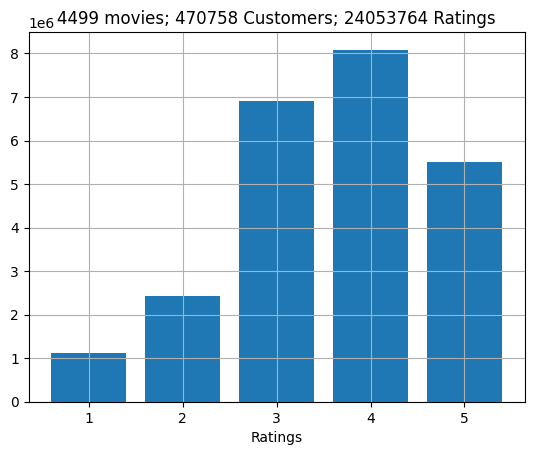

In [ ]:
#plotting the above using bar graph

import matplotlib.pyplot as plt

Ratings=[1,2,3,4,5]
plt.bar(Ratings,Ratings_data["count"]);

plt.title(f"{movie_count} movies; {customer_count} Customers; {ratings_count} Ratings")
plt.xlabel("Ratings")
plt.grid(True)


#Comparatively very few customers provided the Ratings 1 and 2

In [ ]:
df1["Movie Id"]=pd.to_numeric(df1["Movie Id"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Customer ID  object        
 1   Ratings      float64       
 2   Date         datetime64[ns]
 3   Movie Id     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 917.6+ MB


No of ratings received by each movie and remove the movies which received lesser number of ratings from the customers

In [ ]:
movie_ratings=df1.groupby("Movie Id")["Ratings"].agg(["count"]).sort_index(ascending=True)
movie_ratings

,count
Movie Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#find the threshold value
movie_threshold=round(np.quantile(movie_ratings['count'],0.6),0)
movie_threshold

908.0

In [ ]:
drop_movies=movie_ratings[(movie_ratings["count"]<movie_threshold)].index
drop_movies.shape

(2699,)

No of ratings provided by each customer and remove the customer ID which provided lesser number of ratings

In [ ]:
customer_ratings=df1.groupby("Customer ID")["Ratings"].agg(['count']).sort_index(ascending=True)
customer_ratings

,count
Customer ID,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [ ]:
drop_customer_benchmark=round(np.quantile(customer_ratings["count"],0.6),0)
drop_customer_benchmark

36.0

In [ ]:
customer_rejected=customer_ratings[customer_ratings["count"]<drop_customer_benchmark].index
customer_rejected

Index(['1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072', '1000076',
       ...
       '999919', '999921', '999932', '999935', '99994', '999945', '999949',
       '999972', '999977', '999988'],
      dtype='object', name='Customer ID', length=282042)

Remove rejected movies and customer Ids from the df dataframe

In [ ]:
df1=df1[~df1["Movie Id"].isin(drop_movies)]
df1=df1[~(df1["Customer ID"].isin(customer_rejected))]
df1.shape

(19695836, 4)

Read the 2nd csv file containing movie names and movie ids into a dataframe

In [ ]:
df2=pd.read_csv("Copy of movie_titles (2).csv",encoding="ISO-8859-1",on_bad_lines='skip',header=None,usecols=[0,1,2],names=["Movie Id","Year","Movie Name"])
df2

,Movie Id,Year,Movie Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=28ef4a51739cb378b40fc9a92ce411e4b7df24e432c976b8f4487b4f73446ece
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [ ]:
reader=Reader()

In [ ]:
data=Dataset.load_from_df(df1[["Customer ID","Movie Id","Ratings"]][:100000],reader)

In [ ]:
model=SVD()

In [ ]:
cross_validate(model,data,measures=['RMSE'],cv=3)

{'test_rmse': array([1.01468452, 1.02254731, 1.01611115]),
 'fit_time': (1.4638280868530273, 1.4609558582305908, 1.4923319816589355),
 'test_time': (0.207841157913208, 0.4245588779449463, 0.605504035949707)}

Remove the rejected movies from the df2 dataframe

In [ ]:
#First copy df2 dataframe to another dataframe and make changes on it

df3=df2
df3=df3[~(df3["Movie Id"].isin(drop_movies))]
df3.shape

(15071, 3)

In [ ]:
df1

,Customer ID,Ratings,Date,Movie Id
696,712664,5.0,2004-02-01,3
697,1331154,4.0,2004-07-03,3
698,2632461,3.0,2005-07-22,3
699,44937,5.0,2004-06-22,3
700,656399,4.0,2003-09-20,3
...,...,...,...,...
24056842,1055714,5.0,2005-06-20,4496
24056843,2643029,4.0,2005-09-10,4496
24056844,267802,4.0,2005-09-14,4496
24056845,1559566,3.0,2005-11-07,4496


Estimating the Ratings given by Customer_id 712664 to all the movies mentioned in df3 dataframe

In [ ]:
df3["Estimate_Score"]=df3["Movie Id"].apply(lambda x:model.predict(712664,x).est)

<ipython-input-78-8c7581ea2480>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Estimate_Score"]=df3["Movie Id"].apply(lambda x:model.predict(712664,x).est)


In [ ]:
df3

,Movie Id,Year,Movie Name,Estimate_Score
2,3,1997.0,Character,3.617335
4,5,2004.0,The Rise and Fall of ECW,3.887737
5,6,1997.0,Sick,3.128600
7,8,2004.0,What the #$*! Do We Know!?,3.175400
15,16,1996.0,Screamers,3.169068
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.585312
17766,17767,2004.0,Fidel Castro: American Experience,3.585312
17767,17768,2000.0,Epoch,3.585312
17768,17769,2003.0,The Company,3.585312


In [ ]:
#Suggested top5 movies for the user 712664 based on the above ratings

df3.sort_values("Estimate_Score",ascending=False).head(5)["Movie Name"]

,Movie Name
24,Inspector Morse 31: Death Is Now My Neighbour
4,The Rise and Fall of ECW
27,Lilo and Stitch
17,Immortal Beloved
29,Something's Gotta Give
